In [25]:
# ===============================
# 1️⃣ Setup
# ===============================

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

print("Libraries imported successfully!")


Libraries imported successfully!


# ۱. راه‌اندازی اولیه (Setup)
در این بخش کتابخانه‌های مورد نیاز فراخوانی می‌شوند:
- `networkx`: برای ساخت و مدیریت گراف‌ها و توپولوژی‌های شبکه.
- `numpy`: برای محاسبات عددی و آماری.
- `matplotlib`: برای رسم نمودارها و بصری‌سازی گراف.
- `random`: برای شبیه‌سازی احتمالات و انتخاب‌های تصادفی.


In [26]:
# ==================================
# 2️⃣ Graph Generation
# ==================================

def generate_path_graph(n):
    return nx.path_graph(n)

def generate_complete_graph(n):
    return nx.complete_graph(n)

def generate_tree_graph(r, h):
    return nx.balanced_tree(r, h)

def generate_small_world(n, k, p):
    return nx.watts_strogatz_graph(n, k, p)


# ۲. تولید توپولوژی‌های شبکه (Graph Generation)
طبق مستندات پروژه، چهار نوع توپولوژی برای ارتباط ایجنت‌ها تعریف می‌کنیم:
1. **خطی (Path):** ارتباط زنجیره‌ای ساده.
2. **کامل (Complete):** همه با همه در ارتباطند (بیشترین سربار ارتباطی).
3. **سلسله‌مراتب (Tree):** ساختار درختی مشابه سازمان‌ها (مدیر-کارمند).
4. **دنیای کوچک (Small World):** مدلی که تعادلی بین خوشه‌بندی و طول مسیر کوتاه ایجاد می‌کند (توپولوژی انتخابی برای مقاومت).


In [27]:
# ==================================
# Graph Visualization
# ==================================

def draw_graph(G, title):
    plt.figure(figsize=(6,6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()


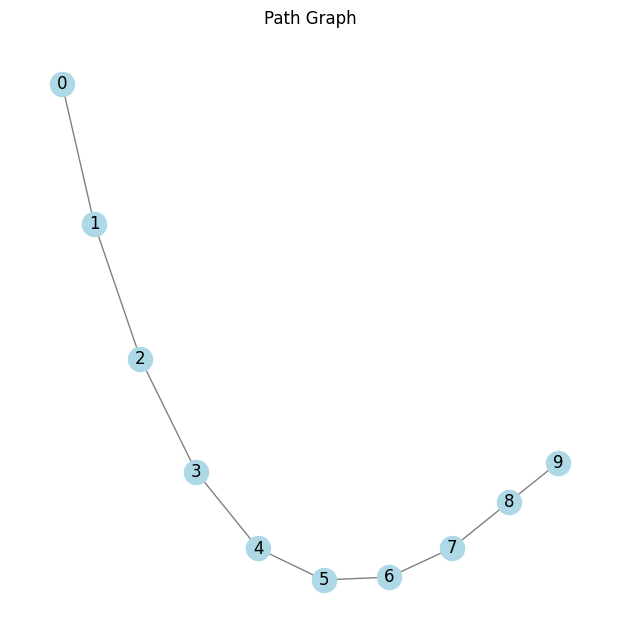

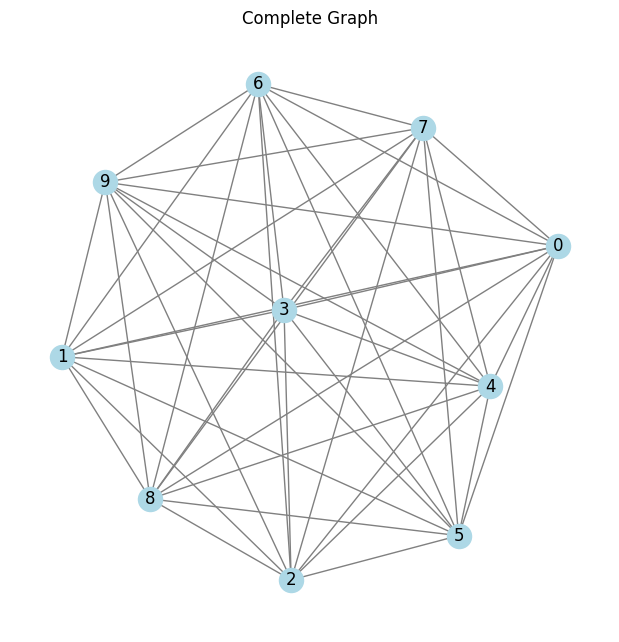

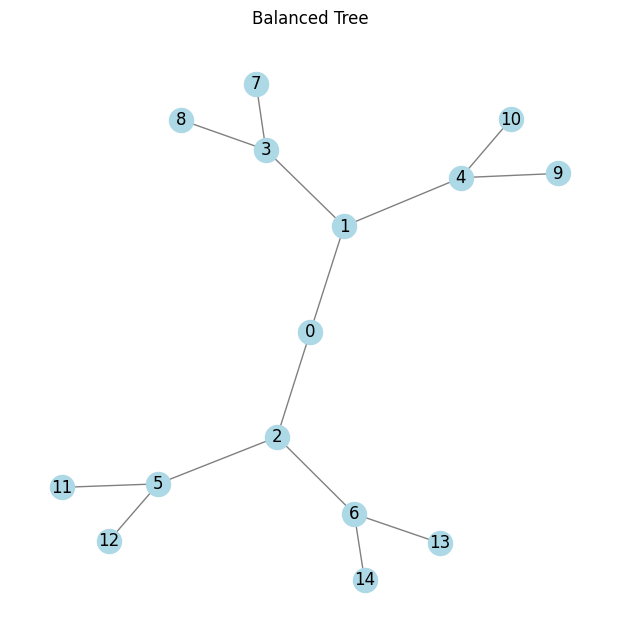

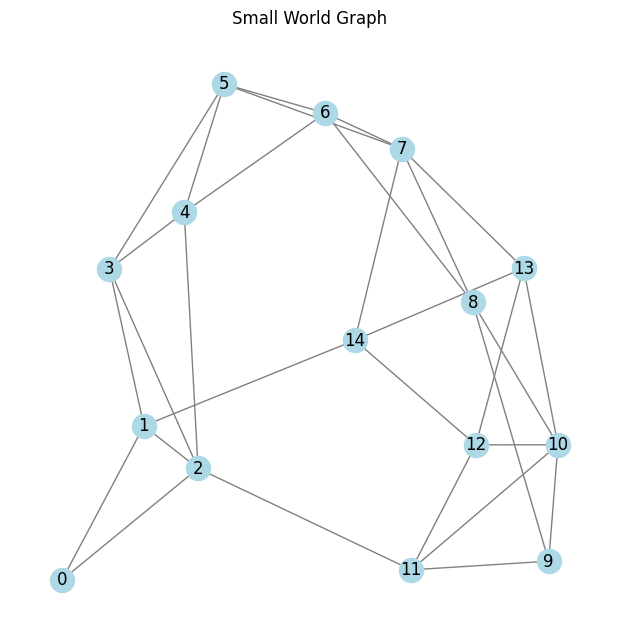

In [28]:
# ==================================
# Generate Sample Graphs
# ==================================

G1 = generate_path_graph(10)
draw_graph(G1, "Path Graph")

G2 = generate_complete_graph(10)
draw_graph(G2, "Complete Graph")

G3 = generate_tree_graph(2, 3)
draw_graph(G3, "Balanced Tree")

G4 = generate_small_world(15, 4, 0.2)
draw_graph(G4, "Small World Graph")


# ۳. بصری‌سازی ساختارها
این تابع برای نمایش گرافیکی نحوه اتصال ایجنت‌ها به یکدیگر استفاده می‌شود تا تفاوت ساختاری توپولوژی‌ها قابل مشاهده باشد.


In [29]:
# ==================================
# 3️⃣ Attribute Assignment
# ==================================

def initialize_states(G):
    for node in G.nodes():
        G.nodes[node]['state'] = 0  # all start correct

def assign_roles_smart(G, topology_type="General"):
    """
    Assigns roles based on topology type.
    For Trees: Node 0 is forced to be Leader.
    For Others: Based on Degree Centrality.
    """
    n = len(G.nodes())

    # Reset all to Worker first
    nx.set_node_attributes(G, 'Worker', 'role')

    if topology_type == "Hierarchical":
        # In balanced_tree, node 0 is the root
        G.nodes[0]['role'] = 'Leader'
        # Assign next level as Reviewers (neighbors of root)
        root_neighbors = list(G.neighbors(0))
        for node in root_neighbors:
            G.nodes[node]['role'] = 'Reviewer'
        # Others remain Workers
    else:
        # Standard logic for other graphs
        centrality = nx.degree_centrality(G)
        sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

        for i, (node, _) in enumerate(sorted_nodes):
            if i < max(1, 0.1 * n): # At least 1 leader
                G.nodes[node]['role'] = 'Leader'
            elif i < 0.3 * n:
                G.nodes[node]['role'] = 'Reviewer'
            else:
                G.nodes[node]['role'] = 'Worker'



# ۴. تخصیص ویژگی‌ها و نقش‌ها (Attribute Assignment)
در این مرحله به هر ایجنت (گره) ویژگی‌های زیر داده می‌شود:
- **State:** وضعیت سلامت (۰: سالم، ۱: دارای توهم/خطا).
- **Role:** نقش ایجنت بر اساس میزان مرکزیت (Degree Centrality):
    - **Leader:** ۱۰٪ گره‌های برتر (گره‌های مرکزی).
    - **Reviewer:** ۲۰٪ بعدی (گره‌های میانی و ناظر).
    - **Worker:** سایر گره‌ها (لایه اجرایی).


In [30]:
# ==================================
# Apply Attributes Example
# ==================================

initialize_states(G4)
# assign_roles(G4)
assign_roles_smart(G4)

for node in G4.nodes(data=True):
    print(node)


(0, {'state': 0, 'role': 'Worker'})
(1, {'state': 0, 'role': 'Reviewer'})
(2, {'state': 0, 'role': 'Leader'})
(3, {'state': 0, 'role': 'Reviewer'})
(4, {'state': 0, 'role': 'Worker'})
(5, {'state': 0, 'role': 'Worker'})
(6, {'state': 0, 'role': 'Worker'})
(7, {'state': 0, 'role': 'Leader'})
(8, {'state': 0, 'role': 'Worker'})
(9, {'state': 0, 'role': 'Worker'})
(10, {'state': 0, 'role': 'Reviewer'})
(11, {'state': 0, 'role': 'Worker'})
(12, {'state': 0, 'role': 'Worker'})
(13, {'state': 0, 'role': 'Worker'})
(14, {'state': 0, 'role': 'Worker'})


In [31]:
# ==================================
# 4️⃣ Fault Injection - Random
# ==================================

def inject_random_faults(G, k):
    """
    Randomly select k nodes and mark them as faulty (state = 1)
    """
    nodes = list(G.nodes())
    faulty_nodes = random.sample(nodes, k)

    for node in faulty_nodes:
        G.nodes[node]['state'] = 1

    return faulty_nodes


In [32]:
# ==================================
# 4️⃣ Fault Injection - High Impact
# ==================================

def inject_targeted_faults(G, k):
    """
    Select top-k highest centrality nodes as faulty
    """
    centrality = nx.degree_centrality(G)

    sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

    faulty_nodes = [node for node, _ in sorted_nodes[:k]]

    for node in faulty_nodes:
        G.nodes[node]['state'] = 1

    return faulty_nodes


# ۵. سناریوهای تزریق خطا (Fault Injection)
برای شروع شبیه‌سازی، باید تعدادی از ایجنت‌ها را "بیمار" کنیم. دو استراتژی داریم:
1. **تصادفی (Random):** خطا در ایجنت‌های رندوم رخ می‌دهد (اشکال فنی معمول).
2. **هدفمند (Targeted):** خطا به ایجنت‌های مرکزی (Leader) تزریق می‌شود (حمله سایبری).


In [33]:
# ==================================
# 5️⃣ Independent Cascade Model
# ==================================

def propagate_independent_cascade(G, p):
    """
    One propagation step using probability p
    """
    new_states = {}

    for node in G.nodes():
        if G.nodes[node]['state'] == 1:  # faulty node
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['state'] == 0:
                    if random.random() < p:
                        new_states[neighbor] = 1

    # apply updates
    for node in new_states:
        G.nodes[node]['state'] = 1


### پیاده‌سازی مدل آبشاری مستقل (Independent Cascade Model)
طبق بخش **3.ii.A** و **3.ii.B** داکیومنت، این تابع منطق اصلی انتشار خطا را پیاده‌سازی می‌کند.
- هر گره سالم اگر همسایه آلوده داشته باشد، با احتمال $p$ آلوده می‌شود.
- **قانون مدیر (Manager Rule):** اگر نقش گره `Leader` باشد و بیش از ۵۰٪ زیرمجموعه‌اش آلوده باشند، او نیز حتماً آلوده می‌شود (فشار از پایین به بالا).


In [34]:
# ==================================
# Manager 50% Rule
# ==================================

def apply_manager_rule(G):
    """
    If a Leader receives >50% faulty inputs, it becomes faulty
    """
    new_faults = []

    for node in G.nodes():
        if G.nodes[node]['role'] == 'Leader':
            neighbors = list(G.neighbors(node))
            if len(neighbors) == 0:
                continue

            faulty_count = sum(G.nodes[n]['state'] for n in neighbors)

            if faulty_count / len(neighbors) > 0.5:
                new_faults.append(node)

    for node in new_faults:
        G.nodes[node]['state'] = 1


In [35]:
# ==================================
# Trust Weight Assignment
# ==================================

def assign_trust_weights(G):
    for u, v in G.edges():
        G[u][v]['trust'] = random.uniform(0.3, 1.0)


def propagate_trust_model(G, threshold):
    new_faults = []

    for node in G.nodes():
        if G.nodes[node]['state'] == 0:
            neighbors = list(G.neighbors(node))

            total_trust = 0

            for neighbor in neighbors:
                if G.nodes[neighbor]['state'] == 1:
                    total_trust += G[node][neighbor]['trust']

            if total_trust > threshold:
                new_faults.append(node)

    for node in new_faults:
        G.nodes[node]['state'] = 1


### پیاده‌سازی مدل مبتنی بر اعتماد (Trust Model)
طبق بخش **3.ii.C** داکیومنت، این مدل پیچیده‌تر از مدل احتمالی ساده است.
- به هر یال (ارتباط بین دو ایجنت) یک **وزن اعتماد** (بین ۰.۳ تا ۱.۰) اختصاص می‌یابد.
- خطا تنها زمانی منتشر می‌شود که مجموع وزن اعتماد همسایگان آلوده از یک **آستانه (Threshold)** عبور کند.
- این مدل واقع‌گرایانه‌تر است زیرا ایجنت‌ها به همه یکسان اعتماد ندارند.


In [36]:
# ==================================
# 6️⃣ Simulation Loop
# ==================================

def run_simulation(G, steps=10, p=0.3, model="IC"):

    history = []

    for t in range(steps):

        if model == "IC":
            propagate_independent_cascade(G, p)
            apply_manager_rule(G)

        elif model == "TRUST":
            propagate_trust_model(G, threshold=1.5)

        # record stats
        faulty_count = sum(G.nodes[n]['state'] for n in G.nodes())
        history.append(faulty_count)

    return history


### تحلیل مقایسه‌ای توپولوژی‌ها (Topology Comparison)
طبق بخش **5.A** داکیومنت، در این بخش هر چهار نوع معماری شبکه (خطی، کامل، درختی، دنیای کوچک) را در شرایط یکسان تست می‌کنیم.
هدف این است که ببینیم کدام ساختار در برابر انتشار خطا (چه با مدل IC و چه با مدل Trust) مقاومت بیشتری دارد.


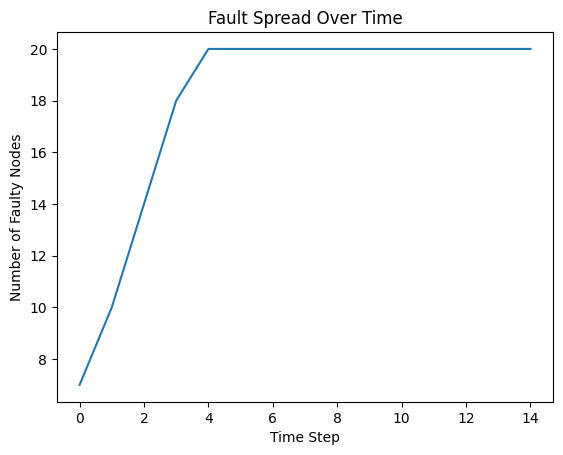

In [37]:
# Reset graph
G_test = generate_small_world(20, 4, 0.2)
initialize_states(G_test)
assign_roles_smart(G_test)
assign_trust_weights(G_test)

inject_random_faults(G_test, k=2)

history = run_simulation(G_test, steps=15, p=0.3, model="IC")

plt.plot(history)
plt.xlabel("Time Step")
plt.ylabel("Number of Faulty Nodes")
plt.title("Fault Spread Over Time")
plt.show()


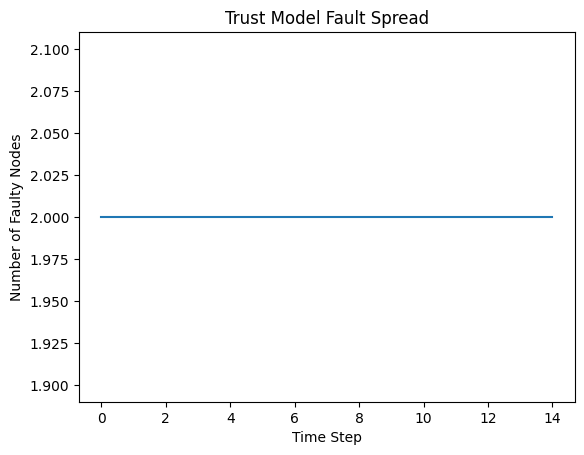

In [38]:
# ==================================
# Trust Model Simulation
# ==================================

# Create fresh graph
G_trust = generate_small_world(20, 4, 0.2)

initialize_states(G_trust)
assign_roles_smart(G_trust)
assign_trust_weights(G_trust)

# Try both attack strategies
inject_random_faults(G_trust, k=2)
# inject_targeted_faults(G_trust, k=2)

history_trust = run_simulation(
    G_trust,
    steps=15,
    model="TRUST"
)

plt.plot(history_trust)
plt.xlabel("Time Step")
plt.ylabel("Number of Faulty Nodes")
plt.title("Trust Model Fault Spread")
plt.show()


[3, 4, 5, 6, 7, 7, 7, 10, 10, 10, 11, 11, 11, 11, 12]
[14, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[3, 4, 7, 9, 10, 10, 12, 13, 15, 16, 19, 21, 22, 22, 23]
[4, 6, 12, 15, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20]


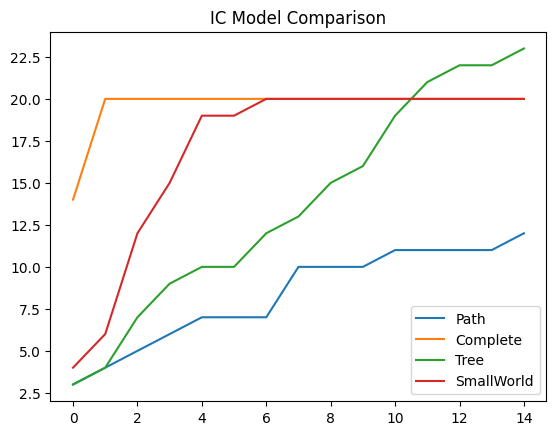

In [39]:
# IC Model Comparison

for graph_name, graph_func in [
    ("Path", lambda: generate_path_graph(20)),
    ("Complete", lambda: generate_complete_graph(20)),
    ("Tree", lambda: generate_tree_graph(2, 4)),
    ("SmallWorld", lambda: generate_small_world(20, 4, 0.2))
]:

    G = graph_func()
    initialize_states(G)
    assign_roles_smart(G)
    assign_trust_weights(G)
    inject_random_faults(G, 2)

    history = run_simulation(G, steps=15, model="IC")
    print(history)

    plt.plot(history, label=graph_name)

plt.legend()
plt.title("IC Model Comparison")
plt.show()


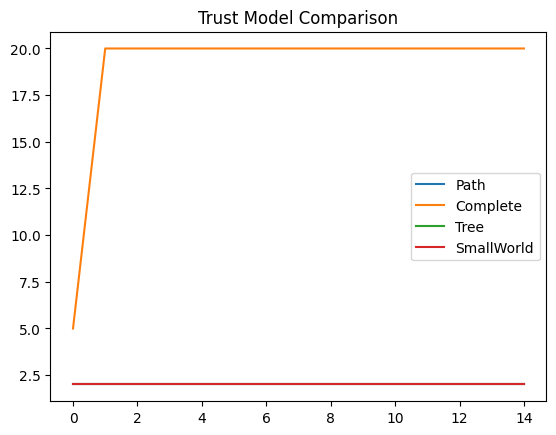

In [40]:
# Trust Model Comparison

for graph_name, graph_func in [
    ("Path", lambda: generate_path_graph(20)),
    ("Complete", lambda: generate_complete_graph(20)),
    ("Tree", lambda: generate_tree_graph(2, 4)),
    ("SmallWorld", lambda: generate_small_world(20, 4, 0.2))
]:

    G = graph_func()
    initialize_states(G)
    assign_roles_smart(G)
    assign_trust_weights(G)
    inject_random_faults(G, 2)

    history = run_simulation(G, steps=15, model="TRUST")

    plt.plot(history, label=graph_name)

plt.legend()
plt.title("Trust Model Comparison")
plt.show()


# ۶. پیاده‌سازی منطق‌های پیشرفته (Advanced Logic)
این بخش شامل توابعی است که هوشمندی سیستم را پیاده‌سازی می‌کنند (طبق بخش ۳ داکیومنت):
- **apply_consensus:** مکانیزم "رأی‌گیری اکثریت". اگر ایجنت سالم باشد اما اکثر همسایگانش سالم باشند، اصلاح می‌شود.
- **apply_rewiring:** مکانیزم "قطع ارتباط". ایجنت سالم ارتباطش با ایجنت خراب را قطع کرده و به یک ایجنت تصادفی دیگر وصل می‌شود.
- **check_role_resistance:** ایجنت‌های Reviewer فقط زمانی خراب می‌شوند که بیش از ۸۰٪ همسایگانشان خراب باشند.


In [41]:
# ==================================
# 7️⃣ Advanced Simulation Logic (Consensus, Rewiring, Role Resistance)
# ==================================

def apply_consensus_and_repair(G):
    """
    Implements Section 3.iv.A (Majority Voting):
    If a node (even faulty) receives >50% healthy signals, it becomes healthy.
    """
    cured_nodes = []
    current_states = nx.get_node_attributes(G, 'state')

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if not neighbors: continue

        # Count healthy neighbors
        healthy_count = sum(1 for n in neighbors if current_states[n] == 0)

        # Majority Voting: If > 50% neighbors are healthy, cure the node
        if healthy_count / len(neighbors) > 0.5:
             cured_nodes.append(node)

    # Apply cures
    for node in cured_nodes:
        G.nodes[node]['state'] = 0

def apply_dynamic_rewiring(G, tolerance_threshold=0.6):
    edges_to_remove = []
    edges_to_add = []
    current_states = nx.get_node_attributes(G, 'state')
    nodes_list = list(G.nodes())

    for node in G.nodes():
        if current_states[node] == 0:  # Healthy node protecting itself
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if current_states[neighbor] == 1:  # Faulty neighbor
                    # Cut tie with 30% probability (aggressive defense)
                    if random.random() < 0.3:
                        edges_to_remove.append((node, neighbor))

                        # Find new partner
                        for _ in range(5): # Try 5 times to find a valid new partner
                            potential = random.choice(nodes_list)
                            # Check: Not self, not existing neighbor, not already connected
                            if potential != node and potential not in neighbors and not G.has_edge(node, potential):
                                edges_to_add.append((node, potential))
                                break

    G.remove_edges_from(edges_to_remove)
    G.add_edges_from(edges_to_add)
    return len(edges_to_add)

def apply_role_resistance(G, node, faulty_ratio):
    """
    Implements Section 3.iv.B (Reviewer/Judge Roles):
    Reviewers only fail if > 80% of neighbors are faulty.
    """
    role = G.nodes[node].get('role', 'Worker')

    if role in ['Reviewer', 'Judge']:
        # Reviewers are resilient: Only infected if > 80% neighbors are faulty
        if faulty_ratio > 0.8:
            return True # Become faulty
        else:
            return False # Resist infection
    else:
        # Normal workers follow standard probability or threshold
        return True # Susceptible to standard infection


In [42]:
# ==================================
# 8️⃣ Unified Simulation Step (Integrating All Logic)
# ==================================

def run_advanced_simulation(G, steps=20, p_infection=0.3, rewire=False):
    history_faults = []
    leader_failed = False

    # Identify Leaders for tracking
    leaders = [n for n, attr in G.nodes(data=True) if attr.get('role') == 'Leader']

    for t in range(steps):
        current_states = nx.get_node_attributes(G, 'state')
        new_states = current_states.copy()

        # --- 1. Infection Phase ---
        for node in G.nodes():
            if current_states[node] == 0: # If healthy
                neighbors = list(G.neighbors(node))
                if not neighbors: continue

                faulty_neighbors = sum(1 for n in neighbors if current_states[n] == 1)

                if faulty_neighbors > 0:
                    # Independent Cascade Probability
                    # Prob = 1 - (1-p)^k  (probability of getting infected by at least one neighbor)
                    prob = 1 - (1 - p_infection) ** faulty_neighbors

                    if random.random() < prob:
                        # Check Role Resistance (Reviewers are harder to kill)
                        faulty_ratio = faulty_neighbors / len(neighbors)
                        if apply_role_resistance(G, node, faulty_ratio):
                            new_states[node] = 1

                # Manager Rule (Pressure from below)
                if G.nodes[node].get('role') == 'Leader':
                    faulty_ratio = faulty_neighbors / len(neighbors)
                    if faulty_ratio > 0.5:
                        new_states[node] = 1

        # Apply Infection
        nx.set_node_attributes(G, new_states, 'state')

        # --- 2. Defense Phase (Repair) ---
        apply_consensus_and_repair(G)

        # --- 3. Defense Phase (Rewiring) ---
        if rewire:
            apply_dynamic_rewiring(G)

        # --- 4. Statistics ---
        current_fault_count = sum(nx.get_node_attributes(G, 'state').values())
        history_faults.append(current_fault_count)

        # Check if ANY leader has failed
        for leader in leaders:
            if G.nodes[leader]['state'] == 1:
                leader_failed = True

    return {
        "history": history_faults,
        "system_failure": leader_failed,
        "final_fault_count": history_faults[-1]
    }


Running Monte Carlo Simulation (50 runs per topology)...
Topology: Path | System Failure Rate: 16.0%
Topology: Complete | System Failure Rate: 32.0%
Topology: Hierarchical | System Failure Rate: 2.0%
Topology: SmallWorld | System Failure Rate: 8.0%


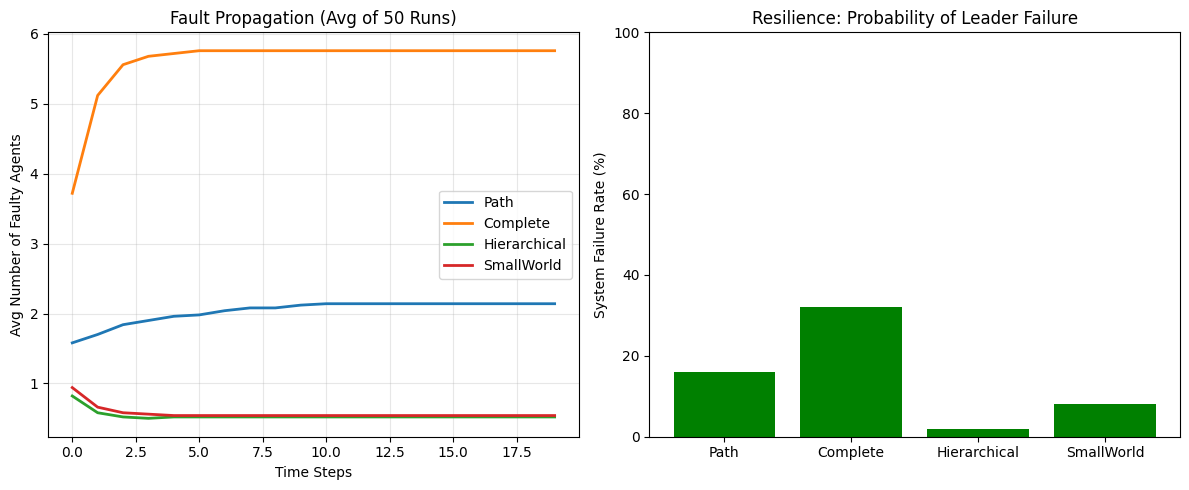

In [43]:
# ==================================
# 9️⃣ Monte Carlo Analysis & Comparison
# ==================================

# Settings
NUM_RUNS = 50  # Run simulation 50 times per topology to get average
STEPS = 20
P_INFECTION = 0.3

results_summary = {}

topologies = [
    ("Path", lambda: generate_path_graph(20)),
    ("Complete", lambda: generate_complete_graph(20)),
    ("Hierarchical", lambda: generate_tree_graph(2, 4)), # ~30 nodes
    ("SmallWorld", lambda: generate_small_world(20, 4, 0.2))
]

print(f"Running Monte Carlo Simulation ({NUM_RUNS} runs per topology)...")

for name, graph_func in topologies:
    failure_counts = 0
    avg_fault_history = np.zeros(STEPS)

    for _ in range(NUM_RUNS):
        G = graph_func()
        initialize_states(G)

        # Use smart role assignment
        topology_type = "Hierarchical" if name == "Hierarchical" else "General"
        assign_roles_smart(G, topology_type)

        inject_random_faults(G, k=2)

        # Run valid simulation function
        res = run_advanced_simulation(G, steps=STEPS, p_infection=P_INFECTION, rewire=True)

        if res['system_failure']:
            failure_counts += 1

        # Pad history if length mismatch (safety check)
        hist = res['history']
        if len(hist) < STEPS:
            hist += [hist[-1]] * (STEPS - len(hist))

        avg_fault_history += np.array(hist)



    # Finalize Averages
    avg_fault_history /= NUM_RUNS
    system_failure_rate = (failure_counts / NUM_RUNS) * 100

    results_summary[name] = {
        "history": avg_fault_history,
        "failure_rate": system_failure_rate
    }
    print(f"Topology: {name} | System Failure Rate: {system_failure_rate}%")

# ==================================
# 🔟 Visualization of Results
# ==================================

plt.figure(figsize=(12, 5))

# Plot A: Spread of Faults over Time
plt.subplot(1, 2, 1)
for name, data in results_summary.items():
    plt.plot(data['history'], label=name, linewidth=2)
plt.xlabel("Time Steps")
plt.ylabel("Avg Number of Faulty Agents")
plt.title("Fault Propagation (Avg of 50 Runs)")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot B: System Failure Rate (Leader Infection)
plt.subplot(1, 2, 2)
names = list(results_summary.keys())
rates = [results_summary[n]['failure_rate'] for n in names]
colors = ['red' if r > 50 else 'green' for r in rates]
plt.bar(names, rates, color=colors)
plt.ylabel("System Failure Rate (%)")
plt.title("Resilience: Probability of Leader Failure")
plt.ylim(0, 100)

plt.tight_layout()
plt.show()
